<a href="https://colab.research.google.com/github/tazar09/heroes_3/blob/main/Copy_of_h3_castles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
list_of_castles = ['Castle', 'Rampart', 'Tower', 'Inferno', 'Necropolis', 'Dungeon', 'Stronghold', 'Fortress', 'Conflux']
url = 'https://heroes.thelazy.net/index.php/'

In [ ]:
url_castles = []
for x in list_of_castles:
  url_castles.append(url + x)
url_castles

['https://heroes.thelazy.net/index.php/Castle',
 'https://heroes.thelazy.net/index.php/Rampart',
 'https://heroes.thelazy.net/index.php/Tower',
 'https://heroes.thelazy.net/index.php/Inferno',
 'https://heroes.thelazy.net/index.php/Necropolis',
 'https://heroes.thelazy.net/index.php/Dungeon',
 'https://heroes.thelazy.net/index.php/Stronghold',
 'https://heroes.thelazy.net/index.php/Fortress',
 'https://heroes.thelazy.net/index.php/Conflux']

In [ ]:
dfs = []
for i, x in enumerate(url_castles):
  match_castle = str(list_of_castles[i]) + ' ' + 'creatures'
  df = pd.read_html(x, match = match_castle)
  dfs.append(df)

1. Castle

In [ ]:
df_castle = pd.DataFrame(dfs[0][0])
df_castle.columns = df_castle.columns.droplevel()
df_castle['Town'] = 'Castle'

2. Rampart

In [ ]:
df_rampart = pd.DataFrame(dfs[1][0])
df_rampart.columns = df_rampart.columns.droplevel()
df_rampart['Town'] = 'Rampart'

3. Tower

In [ ]:
df_tower = pd.DataFrame(dfs[2][0])
df_tower.columns = df_tower.columns.droplevel()
df_tower['Town'] = 'Tower'

4. Inferno

In [ ]:
df_inferno = pd.DataFrame(dfs[3][0])
df_inferno.columns = df_inferno.columns.droplevel()
df_inferno['Town'] = 'Inferno'

5. Necropolis

In [ ]:
df_necropolis = pd.DataFrame(dfs[4][0])
df_necropolis.columns = df_necropolis.columns.droplevel()
df_necropolis['Town'] = 'Necropolis'

6. Dungeon

In [ ]:
df_dungeon = pd.DataFrame(dfs[5][0])
df_dungeon.columns = df_dungeon.columns.droplevel()
df_dungeon['Town'] = 'Dungeon'
# df_dungeon.drop('', axis = 1, inplace = True)

7. Stronghold

In [ ]:
url2 = 'https://heroes.thelazy.net/index.php/Stronghold'
df_stronghold = pd.read_html(url2, match = 'Fortress creatures')
df_stronghold = pd.DataFrame(df_stronghold[0])
df_stronghold.columns = df_stronghold.columns.droplevel()
df_stronghold['Town'] = 'Stronghold'

8. Fortress

In [ ]:
df_fortress = pd.DataFrame(dfs[7][0])
df_fortress.columns = df_fortress.columns.droplevel()
df_fortress['Town'] = 'Fortress'

9. Conflux

In [ ]:
df_conflux = pd.DataFrame(dfs[8][0])
df_conflux.columns = df_conflux.columns.droplevel()
df_conflux['Town'] = 'Conflux'

10. Cove

In [ ]:
url2 = 'https://heroes.thelazy.net/index.php/Cove'
df_cove = pd.read_html(url2, match = 'Cove creatures')
df_cove = pd.DataFrame(df_cove[0])
df_cove.columns = df_cove.columns.droplevel()
df_cove['Town'] = 'Cove'
df_cove.loc[6, 'Lvl'] = "3+"
#exclusion of first level 3 creature for uniformity
df_cove.drop(index = 4, axis = 0, inplace = True)
df_cove = df_cove.reset_index(drop = True)
df_cove.loc[4, 'Lvl'] = '3'
# df_cove.head(20)

_______________________________________________________________________________________________________________________________________________________________

All castles joined

In [ ]:
df_towns = pd.concat([df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove] , axis = 0)

Preprocessing

In [ ]:
df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')
df_towns['Level'] = df_towns['Level'].astype(float)
df_towns.drop('Lvl', axis = 1, inplace = True)

<ipython-input-360-8aec613eca71>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')


In [ ]:
df = df_towns[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw', 'Val','Cost', 'Unnamed: 12_level_1', 'Special']]
df['Unnamed: 12_level_1'] = df['Unnamed: 12_level_1'].fillna('0')
df['Special'] = df['Special'].fillna('No')
df = df.rename(columns={'Unnamed: 12_level_1':'Resource'})
df['Resource'] = df['Resource'].str.get(-1).astype(int)
df['Ranged'] = df['Special'].apply(lambda x: 1 if 'Ranged' in x else 0)
df['Flyer'] = df['Special'].apply(lambda x: 1 if 'Fly' in x else 0)
df['no_retaliation'] = df['Special'].apply(lambda x: 1 if 'No enemy retaliation' in x else (0.2 if any(s in x for s in ['Petrify', 'Paralyze']) else 0))
df['Upgraded'] = df['Level'].apply(lambda x: 1 if ((x / 0.5)%2 == 1) else 0)

________________________________________________________________________________________________________________________________

Adding AI value and Fight Value

In [ ]:
df_ai_value_sod = pd.read_excel('/content/heroes3/h3_ai_value_sod.xlsx')
df_ai_value_hoa = pd.read_excel('/content/heroes3/h3_ai_value_hoa.xlsx')

In [ ]:
df_ai_value_sod['Creature'] = df_ai_value_sod['Creature'].str.strip()
df_ai_value_hoa['Creature'] = df_ai_value_hoa['Creature'].str.strip()
df = df.merge(df_ai_value_hoa, how = 'left', left_on = 'Name', right_on = 'Creature')

In [ ]:
df.tail(5)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,Creature,AI Value,Fight Value
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,565,0,"Ranged (12 shots), Casts Weakness / Disrupting...",1,0,0.0,1,Sorceress,852,655
136,Nix,Cove,6.0,13,16,18,22,80,6,2,...,1000,0,Ignores 30% of enemy attack value,0,0,0.0,0,Nix,1415,1415
137,Nix Warrior,Cove,6.5,14,17,18,22,90,7,2,...,1300,0,Ignores 60% of enemy attack value,0,0,0.0,1,Nix Warrior,2116,1763
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,2200,1,Poisonous,0,0,0.0,0,Sea Serpent,3953,3162
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,4000,2,"Poisonous, Revenge",0,0,0.0,1,Haspid,7220,5554


_________________________________________________________________________________________________________________

We used Horn of the Abyss Ai value and Fight Value, because Shadow of Death did not have records for Cove units. However, we display the differences in the following lines.

In [ ]:
df_merged = df_ai_value_sod.merge(df_ai_value_hoa, on = 'Creature', how = 'left')

In [ ]:
df_merged['AI_dif'] = df_merged['AI Value_y'] - df_merged['AI Value_x']
df_merged['Fight_dif'] = df_merged['Fight Value_y'] - df_merged['Fight Value_x']
df_diff = df_merged[(df_merged['AI_dif'] != 0) | (df_merged['Fight_dif'] != 0)].head(500)

In [ ]:
df_diff.head(20)

,Creature,AI Value_x,Fight Value_x,AI Value_y,Fight Value_y,AI_dif,Fight_dif
3,Faerie Dragon,19580,16317,30501,16317,10921,0
17,Firebird,4547,3248,4336,3097,-211,-151
30,Efreet Sultan,1848,1584,2343,1802,495,218
76,Monk,485,485,582,485,97,0
93,Nomad,345,285,345,415,0,130


In [ ]:
print('There were only {} differences. There where {} neutral creatures, and {} factions\' creatures. \nRegarding the towns\' changes, we note the {}, {} and {}.\nSo, we will keep the HoA scores.' \
      .format(df_diff.shape[0], df_diff.loc[[3,93]].shape[0], df_diff.loc[[17,30,76]].shape[0], df_diff.loc[17, 'Creature'], df_diff.loc[30, 'Creature'], df_diff.loc[76, 'Creature']))

There were only 5 differences. There where 2 neutral creatures, and 3 factions' creatures. 
Regarding the towns' changes, we note the Firebird, Efreet Sultan and Monk.
So, we will keep the HoA scores.


________________________________________________________________________________________________________

In [ ]:
df0 = df.drop(['Creature'], axis = 1)

In [ ]:
df = df0

___________________

_____________


___________

________________________________________________________________________________________________________________________________________________________________
End of first part: df0 is the starting dataframe
________________________________________________________________________________________________________________________________________________________________

Multiple attacks column

In [ ]:
words = ['Double', 'Breath', 'Ferocity', 'adjacent', '3-headed', 'Death blow', 'Unlimited']
pattern = '|'.join(words)
mask = df['Special'].str.contains(pattern)
df[mask]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,diff_
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,150,0,"Ranged (24 shots), Double attack",1,0,0.0,1,184,115,60.0
5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,7,...,240,0,"Flying, Unlimited retaliations",0,1,0.0,1,448,364,23.0
7,Crusader,Castle,4.5,12,12,7,10,35,6,4,...,400,0,Double attack,0,0,0.0,1,588,588,0.0
19,Grand Elf,Rampart,3.5,9,5,3,5,15,7,7,...,225,0,"Ranged (24 shots), Double attack",1,0,0.0,1,331,195,70.0
26,Green Dragon,Rampart,7.0,18,18,40,50,180,10,1,...,2400,1,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4872,3654,33.0
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,4000,2,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,38.0
47,Cerberus,Inferno,3.5,10,8,2,7,25,8,5,...,250,0,"No enemy retaliation, 3-headed attack",0,0,1.0,1,392,308,27.0
67,Dread Knight,Necropolis,6.5,18,18,15,30,120,9,2,...,1500,0,"Undead, Curse, Death blow",0,0,0.0,1,2382,2029,17.0
82,Red Dragon,Dungeon,7.0,19,19,40,50,180,11,1,...,2500,1,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4702,3762,25.0
83,Black Dragon,Dungeon,7.5,25,25,40,50,300,15,1,...,4000,2,"Dragon, Flying, Breath attack, Magic immunity,...",0,1,0.0,1,8721,6783,29.0


Immunity column

In [ ]:
words2 = ['Immune', 'Immunity', 'immunity']
pattern2 = '|'.join(words2)
pattern2

'Immune|Immunity|immunity'

In [ ]:
mask2 = df['Special'].str.contains(pattern2)
df[mask2]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,diff_
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,60,0,Immune to jousting,0,0,0.0,0,80,100,-20.0
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,75,0,Immune to jousting,0,0,0.0,1,115,115,0.0
26,Green Dragon,Rampart,7.0,18,18,40,50,180,10,1,...,2400,1,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4872,3654,33.0
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,4000,2,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,38.0
40,Giant,Tower,7.0,19,16,40,60,150,7,1,...,2000,1,Immunity to Mind spells,0,0,0.0,0,3718,3146,18.0
41,Titan,Tower,7.5,24,24,40,60,300,11,1,...,5000,2,"Ranged (24 shots), No melee penalty, Immunity ...",1,0,0.0,1,7500,5000,50.0
52,Efreeti,Inferno,6.0,16,12,16,24,90,9,2,...,900,0,"Flying, Fire immunity, Hates Genies and Master...",0,1,0.0,0,1670,1413,18.0
53,Efreet Sultan,Inferno,6.5,16,14,16,24,90,13,2,...,1100,0,"Flying, Fire shield, Fire immunity, Hates Geni...",0,1,0.0,1,2343,1802,30.0
70,Troglodyte,Dungeon,1.0,4,3,1,3,5,4,14,...,50,0,Immune to Blinding,0,0,0.0,0,59,73,-19.0
71,Infernal Troglodyte,Dungeon,1.5,5,4,1,3,6,5,14,...,65,0,Immune to Blinding,0,0,0.0,1,84,84,0.0


Resistance column

In [ ]:
words3 = ['Resistance', 'resistance', 'Resists', 'resists']
pattern3 = '|'.join(words3)
pattern3

'Resistance|resistance|Resists|resists'

In [ ]:
mask3 = df['Special'].str.contains(pattern3)
df[mask3]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,diff_
16,Dwarf,Rampart,2.0,6,7,2,4,20,3,8,...,120,0,Resistance +20%,0,0,0.0,0,138,194,-29.0
17,Battle Dwarf,Rampart,2.5,7,7,2,4,20,5,8,...,150,0,Resistance +40%,0,0,0.0,1,209,209,0.0
24,Unicorn,Rampart,6.0,15,14,18,22,90,7,2,...,850,0,"Blind, Aura of Resistance +20%",0,0,0.0,0,1806,1548,17.0
25,War Unicorn,Rampart,6.5,15,14,18,22,110,9,2,...,950,0,"Blind, Aura of Resistance +20%",0,0,0.0,1,2030,2030,0.0
32,Stone Golem,Tower,3.0,7,10,4,5,30,3,6,...,150,0,"Unliving, Spell Damage Resistance +50%",0,0,0.0,0,250,339,-26.0
33,Iron Golem,Tower,3.5,9,10,4,5,35,5,6,...,200,0,"Unliving, Spell Damage Resistance +75%",0,0,0.0,1,412,412,0.0


Caster column

In [ ]:
words4 = ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield']
pattern4 = '|'.join(words4)
mask4 = df['Special'].str.contains(pattern4)
df[mask4]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,diff_
13,Archangel,Castle,7.5,30,30,50,50,250,18,1,...,5000,3,"Flying, Hates Devils and Arch Devils, Resurrec...",0,1,0.0,1,8776,6033,45.0
37,Master Genie,Tower,5.5,12,12,13,16,40,11,3,...,600,0,"Flying, Spellcaster, Hates Efreet and Efreet S...",0,1,0.0,1,942,748,26.0
53,Efreet Sultan,Inferno,6.5,16,14,16,24,90,13,2,...,1100,0,"Flying, Fire shield, Fire immunity, Hates Geni...",0,1,0.0,1,2343,1802,30.0
66,Black Knight,Necropolis,6.0,16,16,15,30,120,7,2,...,1200,0,"Undead, Curse",0,0,0.0,0,2087,1753,19.0
67,Dread Knight,Necropolis,6.5,18,18,15,30,120,9,2,...,1500,0,"Undead, Curse, Death blow",0,0,0.0,1,2382,2029,17.0
91,Ogre Mage,Stronghold,4.5,13,7,6,12,60,5,4,...,400,0,Cast Bloodlust x3,0,0,0.0,1,672,672,0.0
102,Serpent Fly,Fortress,3.0,7,9,2,5,20,9,8,...,220,0,"Flying, Dispel",0,1,0.0,0,268,215,25.0
103,Dragon Fly,Fortress,3.5,8,10,2,5,20,13,8,...,240,0,"Flying, Dispel, Weakness",0,1,0.0,1,312,250,25.0
115,Storm Elemental,Conflux,2.5,9,9,2,8,25,8,6,...,275,0,"Ranged (24 shots), Elemental, Lightning and Ar...",1,0,0.0,1,486,324,50.0
117,Ice Elemental,Conflux,3.5,8,10,3,7,30,6,6,...,375,0,"Ranged (24 shots), Elemental, Ice immunity, Vu...",1,0,0.0,1,380,315,21.0


In [ ]:
df[df['Name'] == 'Efreet Sultan']

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,diff_
53,Efreet Sultan,Inferno,6.5,16,14,16,24,90,13,2,...,1100,0,"Flying, Fire shield, Fire immunity, Hates Geni...",0,1,0.0,1,2343,1802,30.0


In [ ]:
df['diff_'] = round(((df['AI Value'] - df['Fight Value'])/df['Fight Value'])*100,0)
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,New_Column,diff_
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,Immune to jousting,0,0,0.0,0,80,100,0.0,-20.0
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,Immune to jousting,0,0,0.0,1,115,115,0.0,0.0
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,0,Ranged (12 shots),1,0,0.0,0,126,115,0.0,10.0
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,0,"Ranged (24 shots), Double attack",1,0,0.0,1,184,115,0.0,60.0
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,0,"Flying, Two retaliations",0,1,0.0,0,351,324,0.0,8.0


End of the first part of the project

Executing some EDA and configure the data

In [ ]:
dftest = df[df['Upgraded'] == 1]

In [ ]:
dftest['val_per_gold'] = round(dftest['Val']/dftest['Cost'], 2)
dftest['total_value'] = dftest['Val'] * dftest['Grw']
dftest['total_val_per_gold'] = round(dftest['total_value']/dftest['Cost'], 2)

<ipython-input-375-5ef7d40050e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['val_per_gold'] = round(dftest['Val']/dftest['Cost'], 2)
<ipython-input-375-5ef7d40050e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['total_value'] = dftest['Val'] * dftest['Grw']
<ipython-input-375-5ef7d40050e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
dftest.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,New_Column,diff_,val_per_gold,total_value,total_val_per_gold
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,0.0,1,115,115,0.0,0.0,1.53,1610,21.47
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,0,0.0,1,184,115,0.0,60.0,1.23,1656,11.04
5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,7,...,1,0.0,1,448,364,0.0,23.0,1.87,3136,13.07
7,Crusader,Castle,4.5,12,12,7,10,35,6,4,...,0,0.0,1,588,588,0.0,0.0,1.47,2352,5.88
9,Zealot,Castle,5.5,12,10,10,12,30,7,3,...,0,0.0,1,750,500,0.0,50.0,1.67,2250,5.00


In [ ]:
rank = [i for i in range(1, 11)]
rank = pd.DataFrame(rank, columns=['Rank'])

In [ ]:
df1 = pd.DataFrame(dftest.groupby('Town')['Val'].sum().sort_values(ascending = False))
df1['Town']=df1.index
df1.reset_index(drop = True, inplace = True)

In [ ]:
df3 = pd.concat([df1, rank], axis=1)

In [ ]:
df3 = df3.rename(columns = {'Town': 'Town1', 'Rank': 'Rank1'})
df3 = df3[['Town1', 'Val', 'Rank1']]
df3 = df3.sort_values(by = 'Town1').reset_index(drop = True)

In [ ]:
df4 = pd.DataFrame(dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False))
df4['Town1'] = df4.index
df4.reset_index(drop = True, inplace = True)
df4 = df4[['Town1', 'val_per_gold']]

In [ ]:
df5 = pd.concat([df4, rank], axis = 1).rename(columns = {'Town1': 'Town2', 'Rank': 'Rank2'})
df5 = df5.sort_values(by = 'Town2').reset_index(drop = True)

In [ ]:
df6 = pd.concat([df3, df5], axis =1, ignore_index = True)
df6.columns = ['Town1', 'value', 'Rank1', 'Town2', 'value_cost', 'Rank2']
df6['ecart'] = df6['Rank2'] - df6['Rank1']

In [ ]:
df6['pos-neg'] = df6['ecart'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df6

,Town1,value,Rank1,Town2,value_cost,Rank2,ecart,pos-neg
0,Castle,12961,1,Castle,11.28,6,5,1
1,Conflux,10654,7,Conflux,13.99,1,-6,0
2,Cove,11684,5,Cove,11.44,3,-2,0
3,Dungeon,12644,3,Dungeon,11.30,5,2,1
4,Fortress,9749,9,Fortress,10.26,9,0,0
5,Inferno,11359,6,Inferno,10.73,8,2,1
6,Necropolis,9468,10,Necropolis,10.13,10,0,0
7,Rampart,12656,2,Rampart,12.50,2,0,0
8,Stronghold,9910,8,Stronghold,11.09,7,-1,0
9,Tower,12641,4,Tower,11.33,4,0,0


Text(0, 0.5, 'value pe 1 gold')

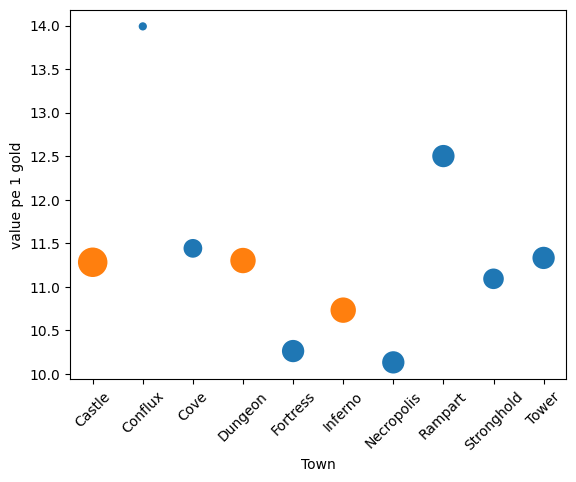

In [ ]:
sns.scatterplot(x = 'Town1', y = 'value_cost', data = df6, size = 'ecart', sizes = (50,500), legend = False, hue = 'pos-neg')
plt.xticks(rotation=45)
plt.xlabel('Town')
plt.ylabel('value pe 1 gold')

<Axes: title={'center': 'Sum of all units of a Town taken as 1'}, xlabel='Town'>

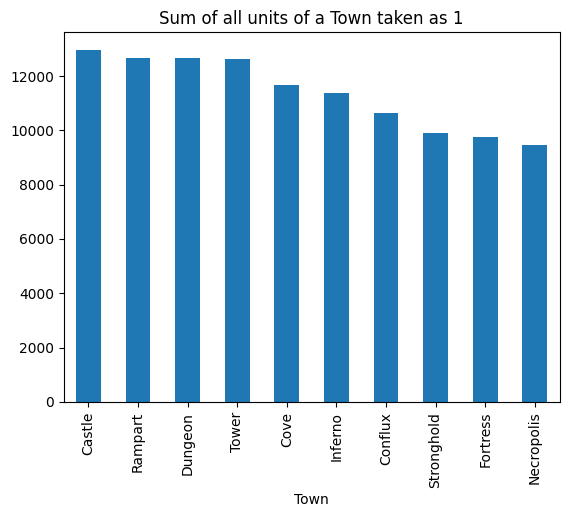

In [ ]:
dftest.groupby('Town')['Val'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Sum of all units of a Town taken as 1')

<Axes: title={'center': 'Sum of all units of a Town taken as 1 at cost'}, xlabel='Town'>

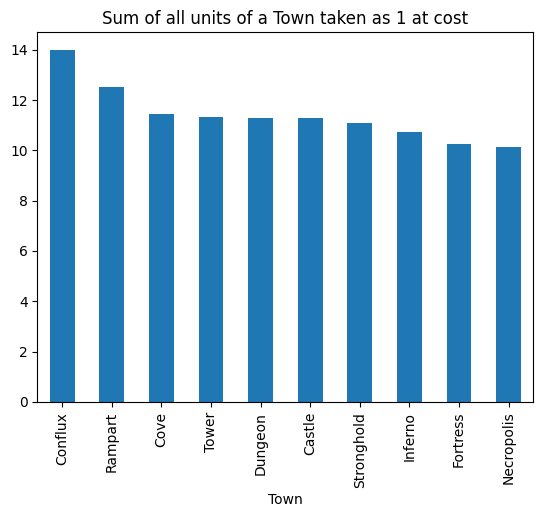

In [ ]:
dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Sum of all units of a Town taken as 1 at cost')

<Axes: title={'center': 'Value per one week dwelling/gold'}, xlabel='Town'>

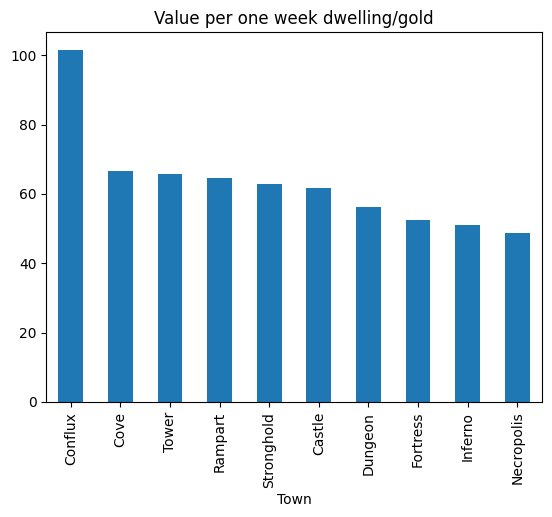

In [ ]:
dftest.groupby('Town')['total_val_per_gold'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Value per one week dwelling/gold')

<Axes: xlabel='Town'>

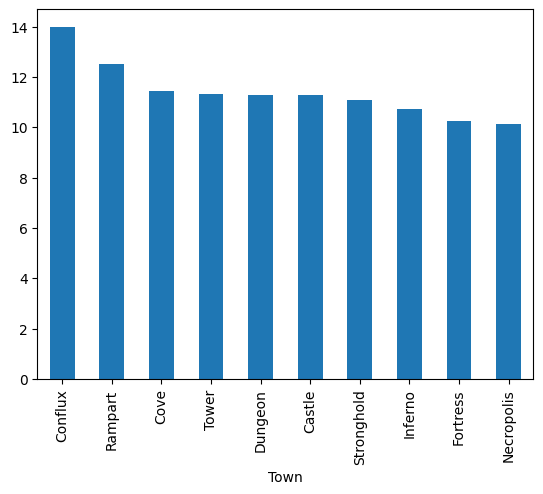

In [ ]:
dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
dftest[dftest['Level'] == 5.5].sort_values(by = 'total_value', axis = 0, ascending = False).head(28)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,New_Column,diff_,val_per_gold,total_value,total_val_per_gold
51,Pit Lord,Inferno,5.5,13,13,13,17,45,7,3,...,0,0.0,1,1224,1071,0.0,14.0,1.75,3672,5.25
93,Thunderbird,Stronghold,5.5,13,11,11,15,60,11,3,...,1,0.0,1,1106,869,0.0,27.0,1.58,3318,4.74
65,Power Lich,Necropolis,5.5,13,10,11,15,40,7,3,...,0,0.0,1,1079,889,0.0,21.0,1.80,3237,5.40
79,Minotaur King,Dungeon,5.5,15,15,12,20,50,8,3,...,0,0.0,1,1068,890,0.0,20.0,1.86,3204,5.57
107,Mighty Gorgon,Fortress,5.5,11,16,12,16,70,6,3,...,0,0.0,1,1028,1028,0.0,0.0,1.71,3084,5.14
37,Master Genie,Tower,5.5,12,12,13,16,40,11,3,...,1,0.0,1,942,748,0.0,26.0,1.57,2826,4.71
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,0,0.0,1,852,655,0.0,30.0,1.51,2556,4.52
23,Dendroid Soldier,Rampart,5.5,9,12,10,14,65,4,3,...,0,0.0,1,803,765,0.0,5.0,1.89,2409,5.67
9,Zealot,Castle,5.5,12,10,10,12,30,7,3,...,0,0.0,1,750,500,0.0,50.0,1.67,2250,5.00
121,Magma Elemental,Conflux,5.5,11,11,6,10,40,6,4,...,0,0.0,1,490,490,0.0,0.0,0.98,1960,3.92


In [ ]:
df[df['Level'] == 7.5].sort_values(by = 'diff_', axis = 0, ascending = False).head(28)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,New_Column,diff_
41,Titan,Tower,7.5,24,24,40,60,300,11,1,...,2,"Ranged (24 shots), No melee penalty, Immunity ...",1,0,0.0,1,7500,5000,0.0,50.0
13,Archangel,Castle,7.5,30,30,50,50,250,18,1,...,3,"Flying, Hates Devils and Arch Devils, Resurrec...",0,1,0.0,1,8776,6033,0.0,45.0
69,Ghost Dragon,Necropolis,7.5,19,17,25,50,200,14,1,...,1,"Dragon, Undead, Flying, Morale -1, Aging",0,1,0.0,1,4696,3228,0.0,45.0
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,2,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,0.0,38.0
55,Arch Devil,Inferno,7.5,26,28,30,40,200,17,1,...,2,"Flying, No enemy retaliation, Luck -1, Hates A...",0,1,1.0,1,7115,5243,1.0,36.0
125,Phoenix,Conflux,7.5,21,18,30,40,200,21,2,...,1,"Flying, Breath attack, Fire immunity, Rebirth",0,1,0.0,1,6721,4929,0.0,36.0
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,2,"Poisonous, Revenge",0,0,0.0,1,7220,5554,0.0,30.0
83,Black Dragon,Dungeon,7.5,25,25,40,50,300,15,1,...,2,"Dragon, Flying, Breath attack, Magic immunity,...",0,1,0.0,1,8721,6783,0.0,29.0
97,Ancient Behemoth,Stronghold,7.5,19,19,30,50,300,9,1,...,1,Defense -80% to enemy target,0,0,0.0,1,6168,5397,0.0,14.0
111,Chaos Hydra,Fortress,7.5,18,20,25,45,250,7,1,...,1,"No enemy retaliation, Attack all adjacent enemies",0,0,1.0,1,5931,5272,1.0,12.0


<Axes: xlabel='Town'>

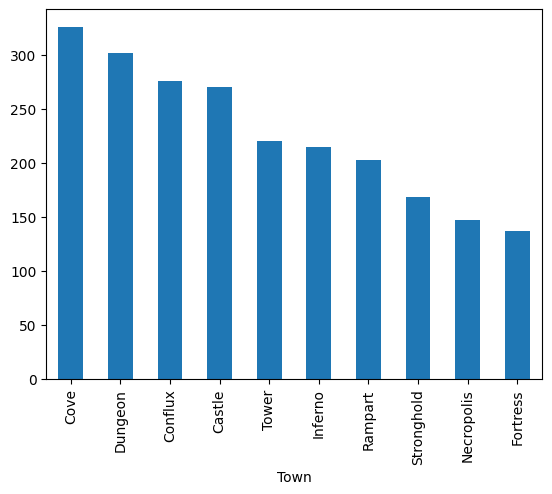

In [ ]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = False).plot(kind = 'bar')